In [1]:
import pandas as pd
import warnings 
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, LineString, Point
warnings.filterwarnings(action='ignore')

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler

# 1. 결측치 확인

In [2]:
data = pd.read_csv('data/new_data5.csv')
data

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,전입학생수,전출학생수,주거환경,경제환경,사회환경,교육환경,청소년유동인구,한부모_가구수,한부모_가구원수,저소득,중간,고소득,학업중단율
0,국립국악고등학교,15.0,442.0,29.466667,47.0,강남구,0.0,5.0,6.44,5.38,6.27,5.84,45613.514389,973,2294,20.4,44.9,34.7,0.5
1,개포고등학교,30.0,643.0,21.433333,72.0,강남구,10.0,11.0,6.44,5.38,6.27,5.84,45613.514389,973,2294,20.4,44.9,34.7,1.9
2,경기고등학교,45.0,1214.0,26.977778,101.0,강남구,36.0,27.0,6.44,5.38,6.27,5.84,45613.514389,973,2294,20.4,44.9,34.7,1.8
3,경기여자고등학교,43.0,1141.0,26.534884,98.0,강남구,21.0,18.0,6.44,5.38,6.27,5.84,45613.514389,973,2294,20.4,44.9,34.7,2.3
4,서울로봇고등학교,24.0,460.0,19.166667,76.0,강남구,0.0,5.0,6.44,5.38,6.27,5.84,45613.514389,973,2294,20.4,44.9,34.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,33.0,20.0,6.10,5.16,5.86,5.55,18514.572581,1157,2709,31.6,46.3,22.0,1.1
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,5.0,7.0,6.10,5.16,5.86,5.55,18514.572581,1157,2709,31.6,46.3,22.0,3.6
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,4.0,18.0,6.10,5.16,5.86,5.55,18514.572581,1157,2709,31.6,46.3,22.0,2.0
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,16.0,6.0,6.10,5.16,5.86,5.55,18514.572581,1157,2709,31.6,46.3,22.0,1.2


In [3]:
data['학교명'].nunique()

320

In [4]:
data.isnull().sum()

학교명         0
학급수         0
학생수         0
학급당평균학생수    0
교원수         0
자치구         0
전입학생수       0
전출학생수       0
주거환경        0
경제환경        0
사회환경        0
교육환경        0
청소년유동인구     0
한부모_가구수     0
한부모_가구원수    0
저소득         0
중간          0
고소득         0
학업중단율       0
dtype: int64

In [5]:
data.corr()

,학급수,학생수,학급당평균학생수,교원수,전입학생수,전출학생수,주거환경,경제환경,사회환경,교육환경,청소년유동인구,한부모_가구수,한부모_가구원수,저소득,중간,고소득,학업중단율
학급수,1.000000,0.890153,0.299327,0.916006,0.315025,0.301954,0.122296,0.060798,0.196025,0.205587,0.271727,0.101903,0.105569,0.110794,0.038541,-0.116635,-0.284077
학생수,0.890153,1.000000,0.683150,0.763824,0.410114,0.342725,0.100465,0.065093,0.166947,0.166384,0.249010,0.074554,0.078466,0.086070,0.035968,-0.095657,-0.348901
학급당평균학생수,0.299327,0.683150,1.000000,0.177689,0.325095,0.235403,0.029224,0.043445,0.046514,0.036330,0.104894,0.026223,0.028448,0.019777,0.042805,-0.050335,-0.343267
교원수,0.916006,0.763824,0.177689,1.000000,0.226929,0.260037,0.128950,0.046981,0.182830,0.205253,0.268371,0.050207,0.051275,0.107880,-0.042892,-0.047642,-0.255094
전입학생수,0.315025,0.410114,0.325095,0.226929,1.000000,0.386182,-0.002736,-0.013163,0.048015,0.106831,0.086572,-0.059782,-0.057279,-0.055315,-0.032231,0.068253,0.018882
전출학생수,0.301954,0.342725,0.235403,0.260037,0.386182,1.000000,-0.057289,-0.066939,-0.026466,0.061381,0.017573,-0.096856,-0.094652,-0.027830,-0.034364,0.049145,-0.005734
주거환경,0.122296,0.100465,0.029224,0.128950,-0.002736,-0.057289,1.000000,0.544610,0.610195,0.371303,0.323578,0.119865,0.117175,-0.059682,0.094830,-0.031316,0.002619
경제환경,0.060798,0.065093,0.043445,0.046981,-0.013163,-0.066939,0.544610,1.000000,0.263616,0.217567,0.067397,0.035820,0.038311,0.240622,-0.087466,-0.111907,-0.042984
사회환경,0.196025,0.166947,0.046514,0.182830,0.048015,-0.026466,0.610195,0.263616,1.000000,0.598433,0.628808,0.004548,0.014190,0.049228,-0.053832,0.006616,-0.010036
교육환경,0.205587,0.166384,0.036330,0.205253,0.106831,0.061381,0.371303,0.217567,0.598433,1.000000,0.401710,-0.344770,-0.337436,-0.110109,0.003532,0.081985,0.011802


# 2. K-means 모델링

data파일을 복사하기

In [6]:
df = data.copy()

In [7]:
labels= np.array(df['학교명'])

In [8]:
school_info = df[['학교명','자치구']]

In [9]:
school_info['학교명'].nunique()

320

In [10]:
school_info

,학교명,자치구
0,국립국악고등학교,강남구
1,개포고등학교,강남구
2,경기고등학교,강남구
3,경기여자고등학교,강남구
4,서울로봇고등학교,강남구
...,...,...
315,동국대학교사범대학부속고등학교,동대문구
316,정화여자상업고등학교,동대문구
317,해성국제컨벤션고등학교,동대문구
318,해성여자고등학교,동대문구


In [11]:
total=df.loc[:,['학급수','학생수','학급당평균학생수','전출학생수','경제환경','교육환경','저소득','학업중단율']]
total

,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율
0,15.0,442.0,29.466667,5.0,5.38,5.84,20.4,0.5
1,30.0,643.0,21.433333,11.0,5.38,5.84,20.4,1.9
2,45.0,1214.0,26.977778,27.0,5.38,5.84,20.4,1.8
3,43.0,1141.0,26.534884,18.0,5.38,5.84,20.4,2.3
4,24.0,460.0,19.166667,5.0,5.38,5.84,20.4,0.2
...,...,...,...,...,...,...,...,...
315,33.0,949.0,28.757576,20.0,5.16,5.55,31.6,1.1
316,19.0,334.0,17.578947,7.0,5.16,5.55,31.6,3.6
317,27.0,635.0,23.518519,18.0,5.16,5.55,31.6,2.0
318,27.0,673.0,24.925926,6.0,5.16,5.55,31.6,1.2


## 데이터 표준화

In [12]:
sd = StandardScaler()
total_sd=pd.DataFrame(sd.fit_transform(total))
total_sd.index = labels

In [13]:
total_sd.head()

,0,1,2,3,4,5,6,7
국립국악고등학교,-1.940161,-1.165275,1.106262,-0.986639,0.147603,1.1236,-0.236796,-0.861804
개포고등학교,0.050598,-0.378385,-0.735055,-0.479179,0.147603,1.1236,-0.236796,-0.080091
경기고등학교,2.041358,1.857009,0.535784,0.874046,0.147603,1.1236,-0.236796,-0.135927
경기여자고등학교,1.775923,1.571223,0.434269,0.112857,0.147603,1.1236,-0.236796,0.143256
서울로봇고등학교,-0.745705,-1.094807,-1.254597,-0.986639,0.147603,1.1236,-0.236796,-1.029314


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


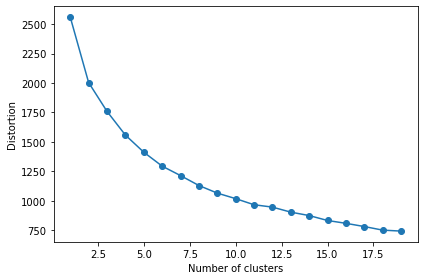

In [14]:
dist =[]
for i in range(1,20):
    k = KMeans(n_clusters=i,
          init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=0)
    k.fit(total_sd)
    dist.append(k.inertia_)

plt.plot(range(1,20),dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

k = 3으로 지정

## 군집화

In [15]:
np.random.seed(2021)

In [16]:
total_sd_arr = total_sd.values

#k값을 3로 설정 후 k-means에 적용시키기
kmeans = KMeans(n_clusters =3,random_state=2021).fit(total_sd_arr)
kmeans.cluster_centers_


array([[-4.27041882e-01, -4.88503930e-01, -2.79097212e-01,
        -3.63395265e-01,  3.75354126e-02, -7.84567892e-02,
        -3.19193178e-02, -2.06395097e-01],
       [ 9.56902231e-01,  1.10574087e+00,  7.58876806e-01,
         6.55366216e-01,  7.60337993e-04,  1.84236626e-01,
         1.14604517e-01, -2.24964284e-01],
       [-1.19815072e+00, -1.42668190e+00, -1.45655213e+00,
        -2.17760702e-01, -3.22887258e-01, -2.62674816e-01,
        -3.06917681e-01,  2.88940540e+00]])

In [17]:
total_sd['cluster'] = kmeans.labels_
total_sd

,0,1,2,3,4,5,6,7,cluster
국립국악고등학교,-1.940161,-1.165275,1.106262,-0.986639,0.147603,1.123600,-0.236796,-0.861804,0
개포고등학교,0.050598,-0.378385,-0.735055,-0.479179,0.147603,1.123600,-0.236796,-0.080091,0
경기고등학교,2.041358,1.857009,0.535784,0.874046,0.147603,1.123600,-0.236796,-0.135927,1
경기여자고등학교,1.775923,1.571223,0.434269,0.112857,0.147603,1.123600,-0.236796,0.143256,1
서울로봇고등학교,-0.745705,-1.094807,-1.254597,-0.986639,0.147603,1.123600,-0.236796,-1.029314,0
...,...,...,...,...,...,...,...,...,...
동국대학교사범대학부속고등학교,0.448750,0.819567,0.943731,0.282010,-1.161117,-1.017909,1.348333,-0.526784,1
정화여자상업고등학교,-1.409292,-1.588082,-1.618518,-0.817486,-1.161117,-1.017909,1.348333,0.869133,2
해성국제컨벤션고등학교,-0.347553,-0.409704,-0.257111,0.112857,-1.161117,-1.017909,1.348333,-0.024254,0
해성여자고등학교,-0.347553,-0.260939,0.065480,-0.902062,-1.161117,-1.017909,1.348333,-0.470947,0


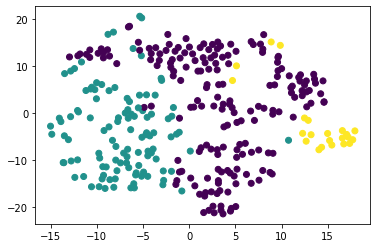

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(total_sd.iloc[:,:8])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

#군집별로 잘 구분이 된 것을 알 수 있다.

In [20]:
total_sd.reset_index(inplace=True)

total_sd.rename(columns={'index':'학교명',0:'학급수',1:'학생수',2:'학급당평균학생수',3:'전출학생수',4:'경제환경',5:'교육환경',6:'저소득',7:'학업중단율'},inplace=True)

In [21]:
total_sd

,학교명,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율,cluster
0,국립국악고등학교,-1.940161,-1.165275,1.106262,-0.986639,0.147603,1.123600,-0.236796,-0.861804,0
1,개포고등학교,0.050598,-0.378385,-0.735055,-0.479179,0.147603,1.123600,-0.236796,-0.080091,0
2,경기고등학교,2.041358,1.857009,0.535784,0.874046,0.147603,1.123600,-0.236796,-0.135927,1
3,경기여자고등학교,1.775923,1.571223,0.434269,0.112857,0.147603,1.123600,-0.236796,0.143256,1
4,서울로봇고등학교,-0.745705,-1.094807,-1.254597,-0.986639,0.147603,1.123600,-0.236796,-1.029314,0
...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,0.448750,0.819567,0.943731,0.282010,-1.161117,-1.017909,1.348333,-0.526784,1
316,정화여자상업고등학교,-1.409292,-1.588082,-1.618518,-0.817486,-1.161117,-1.017909,1.348333,0.869133,2
317,해성국제컨벤션고등학교,-0.347553,-0.409704,-0.257111,0.112857,-1.161117,-1.017909,1.348333,-0.024254,0
318,해성여자고등학교,-0.347553,-0.260939,0.065480,-0.902062,-1.161117,-1.017909,1.348333,-0.470947,0


In [22]:
total_sd['cluster'].value_counts()

0    187
1    111
2     22
Name: cluster, dtype: int64

In [23]:
final = pd.merge(total_sd,school_info,on='학교명',how='inner')
# final.head()

In [24]:
final

,학교명,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율,cluster,자치구
0,국립국악고등학교,-1.940161,-1.165275,1.106262,-0.986639,0.147603,1.123600,-0.236796,-0.861804,0,강남구
1,개포고등학교,0.050598,-0.378385,-0.735055,-0.479179,0.147603,1.123600,-0.236796,-0.080091,0,강남구
2,경기고등학교,2.041358,1.857009,0.535784,0.874046,0.147603,1.123600,-0.236796,-0.135927,1,강남구
3,경기여자고등학교,1.775923,1.571223,0.434269,0.112857,0.147603,1.123600,-0.236796,0.143256,1,강남구
4,서울로봇고등학교,-0.745705,-1.094807,-1.254597,-0.986639,0.147603,1.123600,-0.236796,-1.029314,0,강남구
...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,0.448750,0.819567,0.943731,0.282010,-1.161117,-1.017909,1.348333,-0.526784,1,동대문구
316,정화여자상업고등학교,-1.409292,-1.588082,-1.618518,-0.817486,-1.161117,-1.017909,1.348333,0.869133,2,동대문구
317,해성국제컨벤션고등학교,-0.347553,-0.409704,-0.257111,0.112857,-1.161117,-1.017909,1.348333,-0.024254,0,동대문구
318,해성여자고등학교,-0.347553,-0.260939,0.065480,-0.902062,-1.161117,-1.017909,1.348333,-0.470947,0,동대문구


In [25]:
final.groupby('cluster').mean()

,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율
cluster,,,,,,,,
0,-0.427042,-0.488504,-0.279097,-0.363395,0.037535,-0.078457,-0.031919,-0.206395
1,0.956902,1.105741,0.758877,0.655366,0.000760,0.184237,0.114605,-0.224964
2,-1.198151,-1.426682,-1.456552,-0.217761,-0.322887,-0.262675,-0.306918,2.889405


In [26]:
final[final['cluster']==0].groupby('자치구').sum()

,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율,cluster
자치구,,,,,,,,,
강남구,-1.882927,-4.672526,-5.224308,-3.269414,1.476027,11.236004,-2.367963,0.371663,0
강동구,-0.423036,-3.404107,-4.791559,-6.314171,22.891432,20.835876,7.822151,0.539173,0
강북구,-1.655648,-1.975495,-1.330297,-0.986375,-2.502925,-4.957780,0.864391,-0.487873,0
강서구,-7.867648,-6.936364,-0.284684,-4.312085,-20.093673,-5.299545,-4.188827,-2.597278,0
관악구,-9.062103,-8.118657,-1.546293,-2.705129,-10.278279,-6.407222,-0.155240,-5.054092,0
광진구,0.436308,-0.371595,-0.921436,-3.044229,-9.465163,0.538608,1.551339,-2.490665,0
구로구,-3.311297,-2.756953,-0.577056,-5.186660,8.795188,1.899667,0.370099,-3.432560,0
금천구,-1.124779,-1.638816,-0.835314,-1.832140,-4.882415,-0.527070,-0.720738,-1.827953,0
노원구,-3.241620,-4.368365,-3.093400,-2.705394,-0.370308,-4.239636,23.313070,1.774908,0


In [30]:
final.to_csv('data/Vulnerability_Cluster.csv',index=False)

In [28]:
final

,학교명,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율,cluster,자치구
0,국립국악고등학교,-1.940161,-1.165275,1.106262,-0.986639,0.147603,1.123600,-0.236796,-0.861804,0,강남구
1,개포고등학교,0.050598,-0.378385,-0.735055,-0.479179,0.147603,1.123600,-0.236796,-0.080091,0,강남구
2,경기고등학교,2.041358,1.857009,0.535784,0.874046,0.147603,1.123600,-0.236796,-0.135927,1,강남구
3,경기여자고등학교,1.775923,1.571223,0.434269,0.112857,0.147603,1.123600,-0.236796,0.143256,1,강남구
4,서울로봇고등학교,-0.745705,-1.094807,-1.254597,-0.986639,0.147603,1.123600,-0.236796,-1.029314,0,강남구
...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,0.448750,0.819567,0.943731,0.282010,-1.161117,-1.017909,1.348333,-0.526784,1,동대문구
316,정화여자상업고등학교,-1.409292,-1.588082,-1.618518,-0.817486,-1.161117,-1.017909,1.348333,0.869133,2,동대문구
317,해성국제컨벤션고등학교,-0.347553,-0.409704,-0.257111,0.112857,-1.161117,-1.017909,1.348333,-0.024254,0,동대문구
318,해성여자고등학교,-0.347553,-0.260939,0.065480,-0.902062,-1.161117,-1.017909,1.348333,-0.470947,0,동대문구


In [29]:
final['학교명'].nunique()

320